# Ejercicio 3

**Consideremos 3 variedades diferentes de una especie de halcón, caracterizadas por una longitud de garra distinta. Tenemos medidas de la garra tomada de muestras de cada una de los 3 tipos (longitudes en mm). Estos datos están en el archivo llamado Hallux_length.csv (una columna por especie).**

**La distribución de esta variable puede caracterizarse por una distribución gausiana en el caso de la variedad 1 ($PDF_{var1}$), por una gamma en el caso de la variedad 2 ($PDF_{var2}$), y por una distribución logística para la variedad 3 ($PDF_{var3}$).**

**1) Mediante un ajuste a las distribuciones de cada una de las 3 especies por separado, encontrar qué parámetros caracterizan a cada una de ellas (mean y sd en el caso de la norm; shape y rate en el de la gamma; location y scale para la logis en R).**

In [5]:
data = read.csv(file='Hallux_length.csv', header=TRUE, sep=',', dec='.')
Especie1 = data[, 2]
Especie2 = data[, 3]
Especie3 = data[, 4]
head(data)

,X,var1,var2,var3
,<int>,<dbl>,<dbl>,<dbl>
1,1,45.54759,89.65992,89.81629
2,2,34.54594,94.55731,86.18747
3,3,57.89756,90.64392,86.47623
4,4,47.46944,92.96812,54.27836
5,5,46.20898,89.69514,72.82700
6,6,41.55310,93.40593,72.48884


Despues de leer los datos y separarlos en las 3 especies de halcón, lo primero que haré será un histograma de la primera especie para asegurarnos de que siga una normal, o almenos algo parecido.

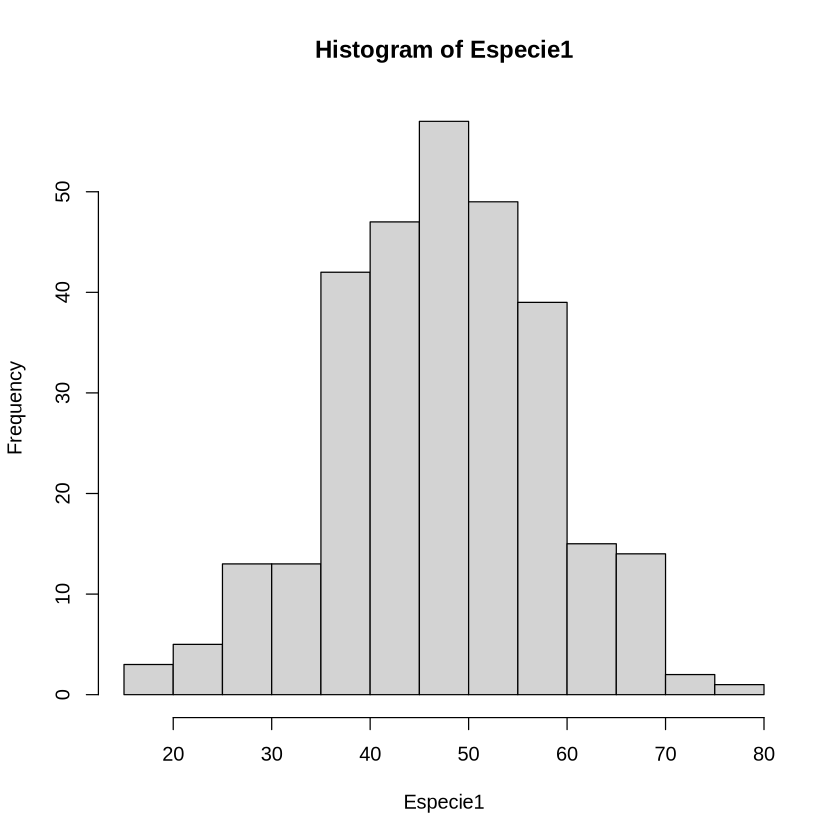

In [19]:
hist(Especie1)

A continuación definire en una función el log-likelihood correspondiente a una normal y usaré la función mle() para estimar los parámetros que mejor se ajusten a los datos.

In [45]:
LL <- function(mu, sigma) {
        R = dnorm(Especie1, mu, sigma)
        -sum(log(R))
}

In [46]:
library(stats4)
fit = mle(LL, start = list(mu = min(Especie1), sigma = 2), method = "L-BFGS-B", lower = c(min(Especie1), 0), upper = c(max(Especie1), Inf))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(mu = min(Especie1), sigma = 2), 
    method = "L-BFGS-B", lower = c(min(Especie1), 0), upper = c(max(Especie1), 
        Inf))

Coefficients:
      Estimate Std. Error
mu    47.15198  0.6191466
sigma 10.72393  0.4378028

-2 log L: 2274.85 

Como observamos los parametros son: 
* mu = 47.15
* sigma = 10.72

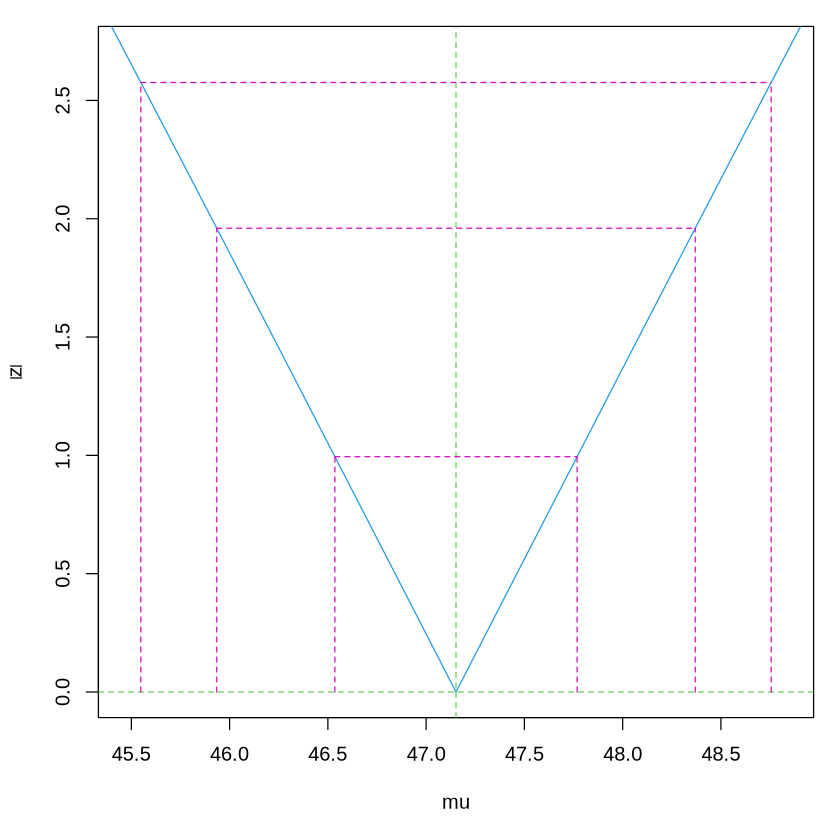

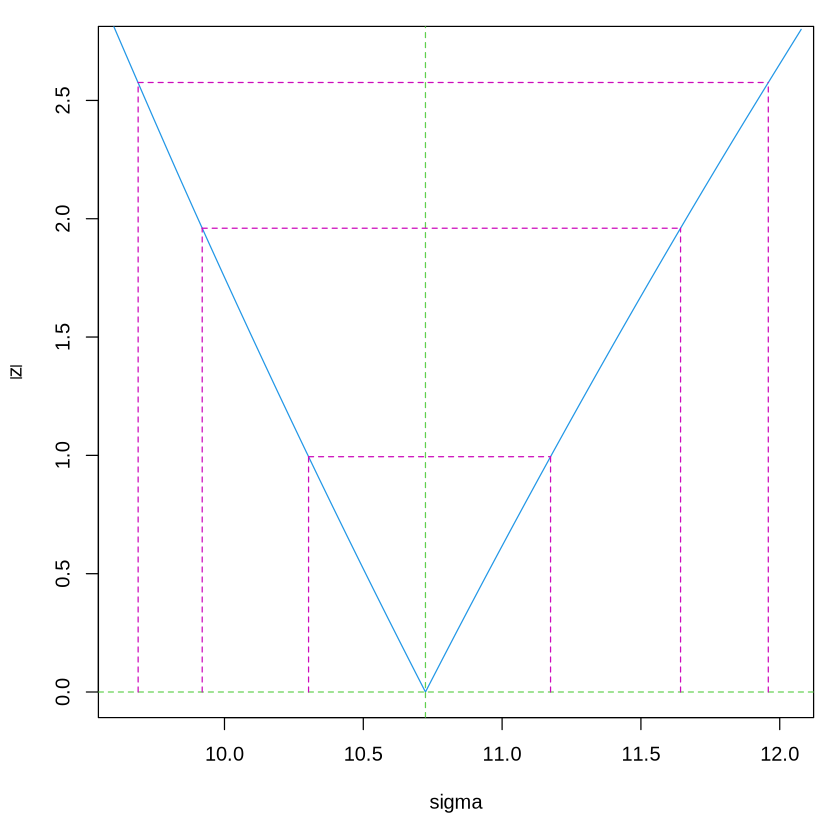

In [53]:
plot(profile(fit), conf = c(99, 95, 68)/100)

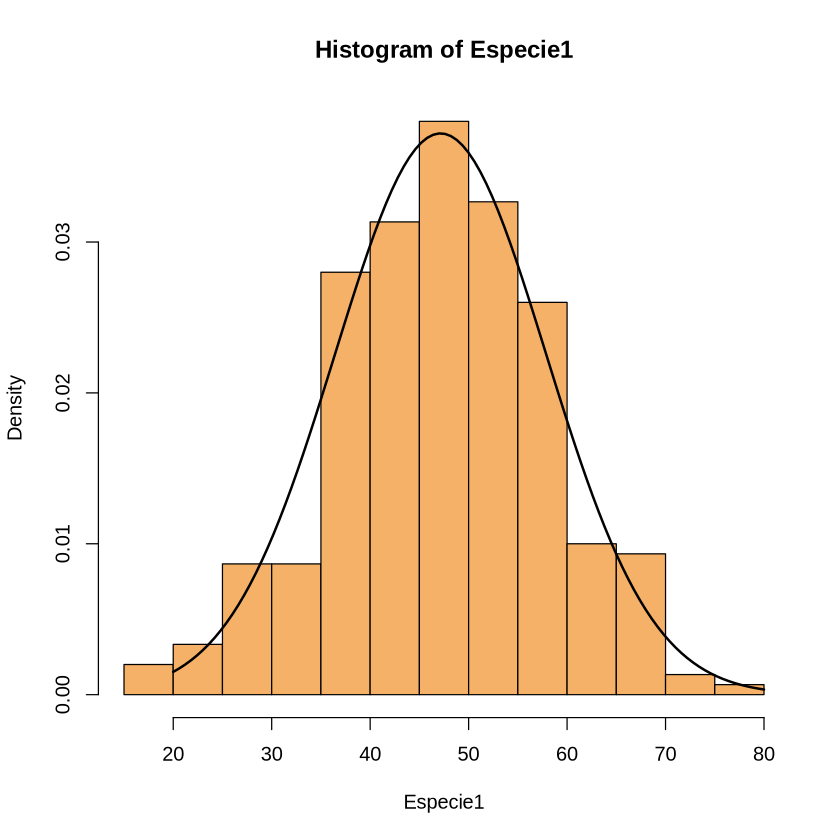

In [52]:
hist(Especie1, freq = FALSE, breaks = 20, col = '#F5B167')
curve(dnorm(x, mean = coef(fit)[1], sd = coef(fit)[2]), col = 'black', from = 20, to = 80, add = TRUE, lwd = 2)

Efectivamente, el ajuste es satisfactorio y vemos como la curva define realmente bien los datos.

A continuación realizaré los mismos pasos para la segunda especie pero esta vez con un ajuste a una funcion gamma.

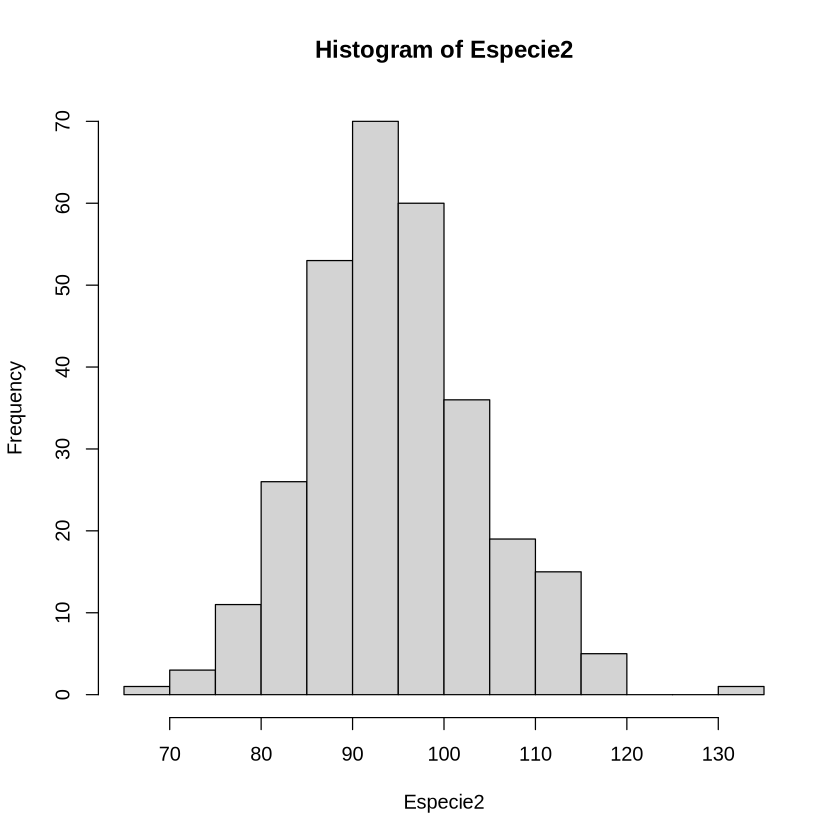

In [6]:
hist(Especie2)

In [54]:
LL <- function(alpha, lambda) {
    x = Especie2
    R = dgamma(x, alpha, lambda)
    -sum(log(R))
}

In [58]:
fit = mle(minuslog = LL, method = "L-BFGS-B", start = list(lambda = 2, alpha = 2), lower = c(0.01, 0.01), upper = c(Inf, Inf))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(lambda = 2, alpha = 2), method = "L-BFGS-B", 
    lower = c(0.01, 0.01), upper = c(Inf, Inf))

Coefficients:
         Estimate Std. Error
alpha  100.438703 8.18622251
lambda   1.059994 0.08660985

-2 log L: 2197.291 

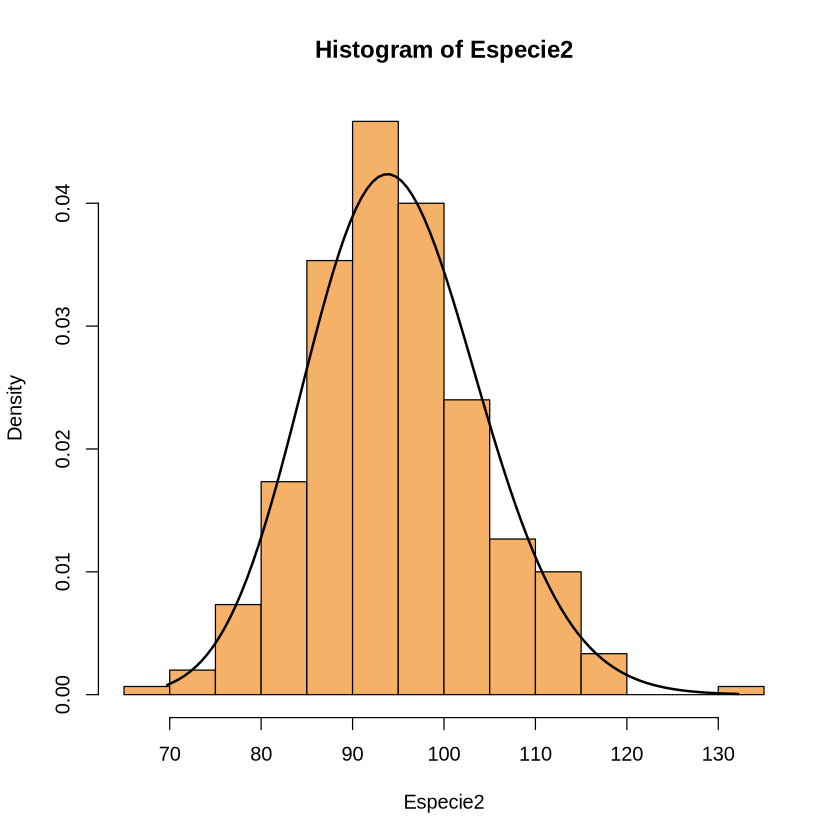

In [73]:
hist(Especie2, freq = FALSE, breaks = 20, col = '#F5B167')
curve(dgamma(x, shape = coef(fit)[1], rate = coef(fit)[2]), 
      col = 'black', from = min(Especie2), to = max(Especie2), 
      add = TRUE, lwd = 2)

Nuevamente observamos como el ajuste es exitoso y nos da unos parametros de:
* alpha = 100.43
* lambda = 1.06

Una vez más realizare los pasos esta vez buscando un ajuste de una distribucion logistica.

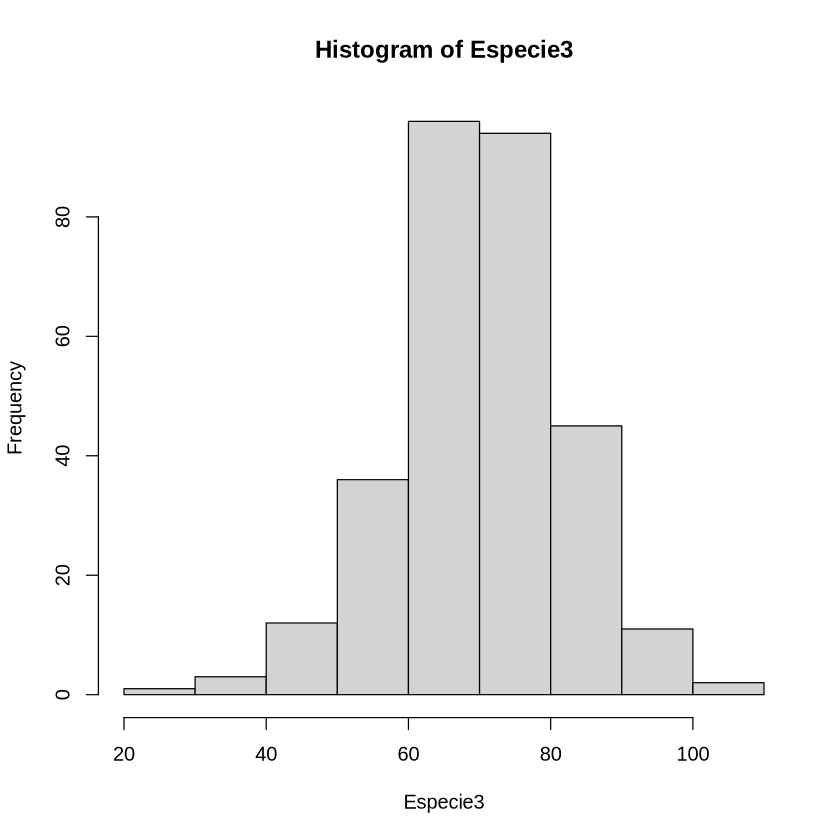

In [74]:
hist(Especie3)

In [75]:
 LL <- function(location, scale) {
    x = Especie3
    R = dlogis(x, location, scale)
    -sum(log(R))
}

In [78]:
fit = mle(minuslog = LL, method = "L-BFGS-B", start = list(location = min(Especie3), scale = 2), lower = c(min(Especie3), 1), upper = c(max(Especie3), max(Especie3)))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(location = min(Especie3), scale = 2), 
    method = "L-BFGS-B", lower = c(min(Especie3), 1), upper = c(max(Especie3), 
        max(Especie3)))

Coefficients:
          Estimate Std. Error
location 70.356899  0.6677442
scale     6.673587  0.3224037

-2 log L: 2337.953 

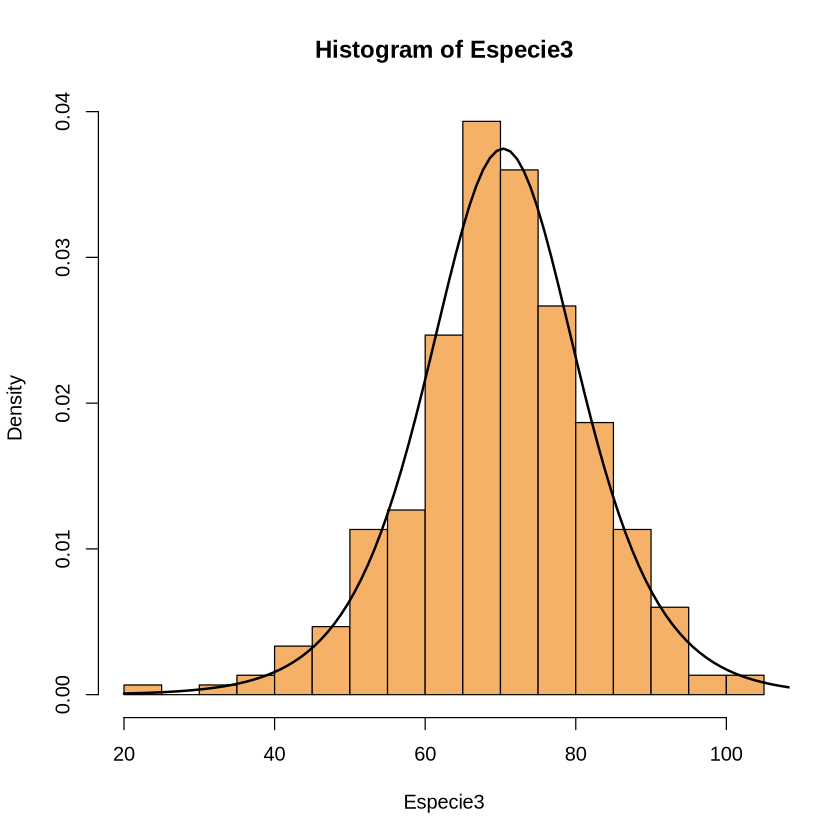

In [82]:
hist(Especie3, freq = FALSE, breaks = 20, col = '#F5B167')
curve(dlogis(x, location = coef(fit)[1], scale = coef(fit)[2]), 
      col = 'black', from = 20, to = 110, 
      add = TRUE, lwd = 2)

De nuevo un resultado exitoso con los parametros:
* location = 70.35
* scale = 6.67

**2) Tenemos una muestra (archivo muestra.csv) que contiene las longitudes de la garra de una mezcla de las 3 especies de halcón. Una vez hemos caracterizado la función densidad de probabilidad de cada especie (fijamos los valores de los parámetros a los obtenidos en el apartado anterior), encontrar qué fracción de cada especie tenemos en esta muestra. Hacerlo mediante un ajuste de la función densidad de probabilidad tipo:**

$f_1\cdot PDF_{var1}+ f_2 \cdot PDF_{var2}+(1-f_1-f_2) \cdot PDF_{var3}$

**Donde $f_1$ y $f_2$ son las fracciones de la variedad 1 y 2, respectivamente.**

In [89]:
muestra = read.csv(file='muestra.csv', header=TRUE, sep=',', dec='.')
muestras = muestra[,2]

In [90]:
head(muestra)

,X,c
,<int>,<dbl>
1,1,41.07017
2,2,43.20608
3,3,56.14877
4,4,31.32859
5,5,55.20682
6,6,44.18047


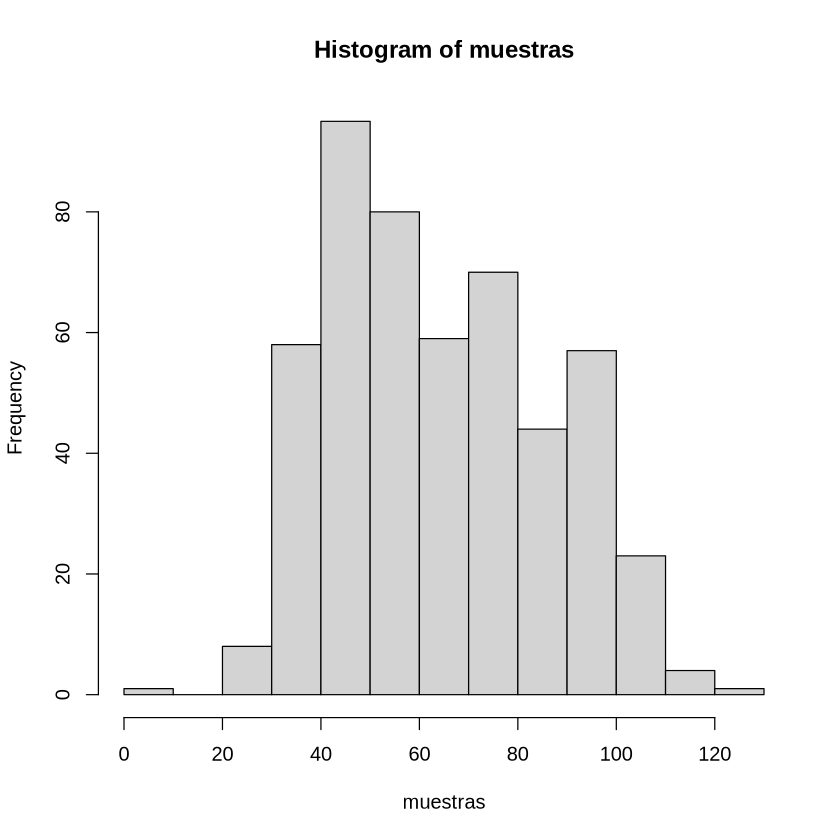

In [91]:
hist(muestras)

Observamos como las muestras no siguen ninguna distribucion concreta. A continuación definire la funcion especificada en el enunciado con los parametros conseguidos en el ejercicio anterior.

In [127]:
dfreq <- function(x,f1, f2) {
    R = f1 * dnorm(x, 47.1, 10.7) + f2 * dgamma(x, 100.4, 1.06) + (1 - f1 - f2) * dlogis(x, 70.3, 6.6)
    R
}

In [128]:
LL <- function(f1, f2) {
    f = dfreq(muestras, f1, f2)
    -sum(log(f))
}

In [129]:
fit = mle(minuslog = LL, method = "L-BFGS-B", start = list(f1 = 0.4, f2 = 0.4), lower = c(0, 0), upper = c(1, 1))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(f1 = 0.4, f2 = 0.4), method = "L-BFGS-B", 
    lower = c(0, 0), upper = c(1, 1))

Coefficients:
    Estimate Std. Error
f1 0.4785392 0.02750433
f2 0.2156765 0.02202754

-2 log L: 4427.072 

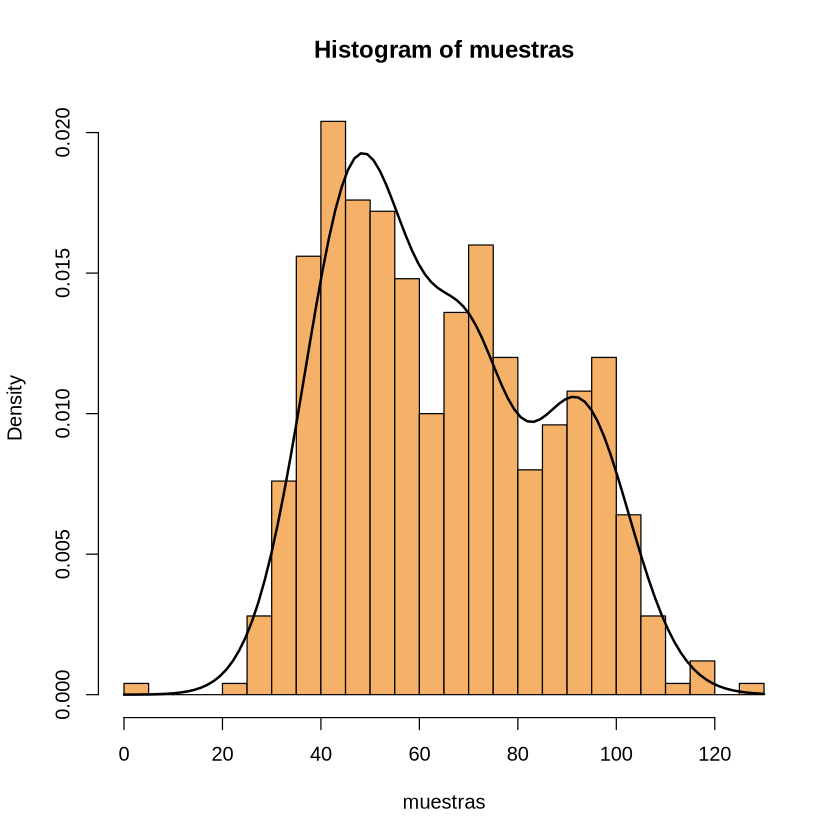

In [130]:
hist(muestras, freq = FALSE, breaks = 20, col = '#F5B167')
curve(dfreq(x, f1 = coef(fit)[1], f2 = coef(fit)[2]), col = 'black', from = 0, to = 130, add = TRUE, lwd = 2)

Como observamos el ajuste de la funcion es exitoso y nos revela que las fracciones de cada especie en esta muestra son las siguientes:
* Especie1: **47.8%**
* Especie2: **21.5%**
* Especie3: **30.7%**